# Análisis de Datos
 ## Se visualizan los datos importados y preprocesados con anterioridad.
 
 ### Trabajo de Fin de Grado - Universidad de Burgos
 #### Jesús García Armario

In [20]:
# Imports necesarios
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

In [6]:
# Cargamos los datos
df = pd.read_excel('ListadoInterv_Preprocesado.xlsx')
# Visualizamos la estructura de los datos
df.head()

,Unnamed: 0,NHC,INTERVENCIÓN,TIPO,TURNO,CARÁCTER ECONÓMICO,PONDERACIÓN,DURACIÓN,ESPECIALIDAD
0,0,1000738,86.7,1,1,33,33,29,PLASTICA
1,1,1001107,86.4,1,0,36,36,33,PLASTICA
2,2,1001240,86.4,1,0,18,7,65,PLASTICA
3,3,1001395,86.4,1,0,55,55,60,PLASTICA
4,4,1001623,86.7,1,1,146,146,42,PLASTICA


In [7]:
# Visualizamos los tipos de datos
df.info()
# Eliminamos la primera columna
df = df.drop('Unnamed: 0', axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7492 entries, 0 to 7491
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Unnamed: 0          7492 non-null   int64  
 1   NHC                 7492 non-null   int64  
 2   INTERVENCIÓN        7492 non-null   float64
 3   TIPO                7492 non-null   int64  
 4   TURNO               7492 non-null   int64  
 5   CARÁCTER ECONÓMICO  7492 non-null   int64  
 6   PONDERACIÓN         7492 non-null   int64  
 7   DURACIÓN            7492 non-null   int64  
 8   ESPECIALIDAD        7492 non-null   object 
dtypes: float64(1), int64(7), object(1)
memory usage: 526.9+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7492 entries, 0 to 7491
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   NHC                 7492 non-null   int64  
 1   INTERVENCIÓN        7492 non-null

<AxesSubplot:>

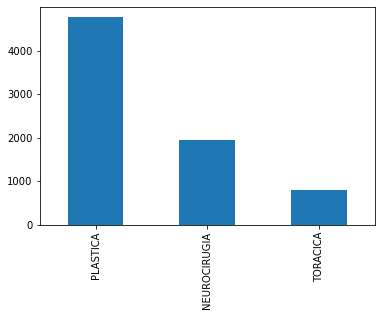

In [10]:
# Mostramos el número de intervenciones por especialidad
# Lo mostramos en un gráfico
df['ESPECIALIDAD'].value_counts().plot(kind='bar')

<AxesSubplot:xlabel='TIPO', ylabel='count'>

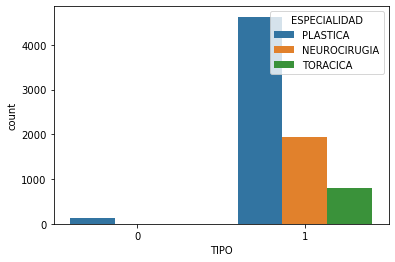

In [11]:
# Vemos si hay relación entre la especialidad y el tipo de intervención
# Lo mostramos en un gráfico
sns.countplot(x='TIPO', hue='ESPECIALIDAD', data=df)

<AxesSubplot:xlabel='ESPECIALIDAD', ylabel='DURACIÓN'>

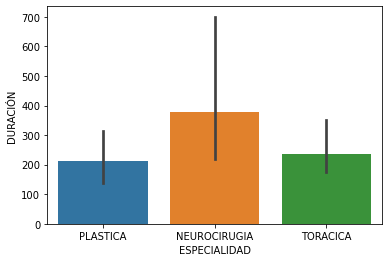

In [14]:
# Vemos si hay diferencias en la duración media de las intervenciones según la especialidad
# Lo mostramos en un gráfico
sns.barplot(x='ESPECIALIDAD', y='DURACIÓN', data=df)

<AxesSubplot:>

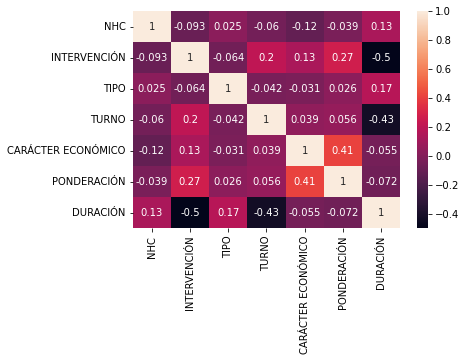

In [17]:
# Determinamos la correlación de Spearman entre las variables
sns.heatmap(df.corr(method='spearman'), annot=True)

<AxesSubplot:>

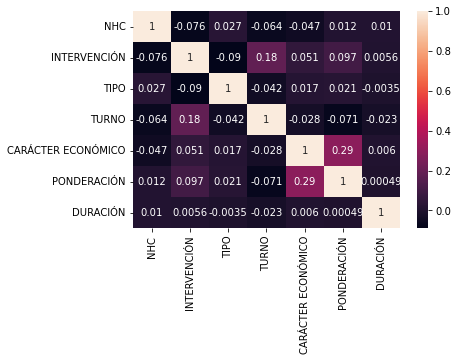

In [18]:
# Determinamos la correlación de Pearson entre las variables
sns.heatmap(df.corr(method='pearson'), annot=True)

La duración media de las intervenciones de neurocirugía es de 376.9467425025853 minutos con un intervalo de confianza de 302.015347944062 minutos
La duración media de las intervenciones de cirugía plástica es de 211.193656794791 minutos con un intervalo de confianza de 88.40524792032947 minutos
La duración media de las intervenciones de cirugía torácica es de 236.75156838143036 minutos con un intervalo de confianza de 106.45235726583783 minutos


<BarContainer object of 3 artists>

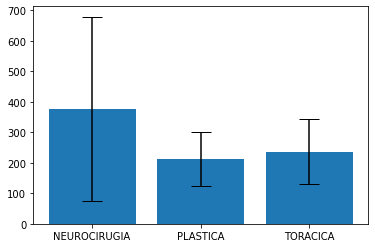

In [23]:
# Vemos si hay relación entre la duración de la intervención y la especialidad
# Se realiza mediante comparación de medias

# Primero separamos los datos en tres grupos según la especialidad
df_neuro = df[df['ESPECIALIDAD'] == 'NEUROCIRUGIA']
df_plast = df[df['ESPECIALIDAD'] == 'PLASTICA']
df_tora = df[df['ESPECIALIDAD'] == 'TORACICA']

# Calculamos la media de la duración de las intervenciones de cada especialidad
media_neuro = df_neuro['DURACIÓN'].mean()
media_plast = df_plast['DURACIÓN'].mean()
media_tora = df_tora['DURACIÓN'].mean()

# Calculamos la desviación típica de la duración de las intervenciones de cada especialidad
desv_neuro = df_neuro['DURACIÓN'].std()
desv_plast = df_plast['DURACIÓN'].std()
desv_tora = df_tora['DURACIÓN'].std()

# Calculamos el número de intervenciones de cada especialidad
n_neuro = len(df_neuro)
n_plast = len(df_plast)
n_tora = len(df_tora)

# Calculamos el intervalo de confianza de la duración de las intervenciones de cada especialidad
intervalo_neuro = 1.96 * desv_neuro / np.sqrt(n_neuro)
intervalo_plast = 1.96 * desv_plast / np.sqrt(n_plast)
intervalo_tora = 1.96 * desv_tora / np.sqrt(n_tora)

# Mostramos los resultados
print('La duración media de las intervenciones de neurocirugía es de', media_neuro, 'minutos con un intervalo de confianza de', intervalo_neuro, 'minutos')
print('La duración media de las intervenciones de cirugía plástica es de', media_plast, 'minutos con un intervalo de confianza de', intervalo_plast, 'minutos')
print('La duración media de las intervenciones de cirugía torácica es de', media_tora, 'minutos con un intervalo de confianza de', intervalo_tora, 'minutos')

# Lo representamos en un gráfico
plt.bar(['NEUROCIRUGIA', 'PLASTICA', 'TORACICA'], [media_neuro, media_plast, media_tora], yerr=[intervalo_neuro, intervalo_plast, intervalo_tora], capsize=10)

In [27]:
# Imprimimos los resultados
f,p = stats.f_oneway(df_neuro['DURACIÓN'], df_plast['DURACIÓN'], df_tora['DURACIÓN'])
print('El valor de la estadística F es', f)
print('El valor del p-valor es', p)
# Comprobamos si son diferentes el tipo de intervención y la especialidad
# Se realiza mediante prueba de chi-cuadrado
chi,p,dof,expected = stats.chi2_contingency(pd.crosstab(df['TIPO'], df['ESPECIALIDAD']))
print('El valor del estadístico chi-cuadrado es', chi)
print('El valor del p-valor es', p)
print('La matriz de frecuencias esperadas es', expected)
# Realizamos una prueba de normalidad de los datos
# Se realiza mediante prueba de Shapiro-Wilk
stat,p = stats.shapiro(df['DURACIÓN'])
print('El valor de la estadística es', stat)
print('El valor del p-valor es', p)

El valor de la estadística F es 1.044445964235172
El valor del p-valor es 0.35193797415619593
El valor del estadístico chi-cuadrado es 69.61441052105093
El valor del p-valor es 7.645798087901219e-16
La matriz de frecuencias esperadas es [[  34.84917245   85.78950881   14.36131874]
 [1899.15082755 4675.21049119  782.63868126]]
El valor de la estadística es 0.015351057052612305
El valor del p-valor es 0.0


c:\Users\Jesus\anaconda3\lib\site-packages\scipy\stats\morestats.py:1760: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")
